In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
from matplotlib import cm
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
os.chdir('../src')
import rce

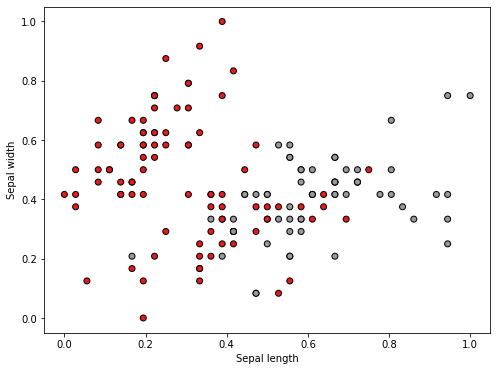

In [3]:
iris = datasets.load_iris()
X_temp = iris.data[:, :2] 
y_temp = iris.target

df = pd.DataFrame(X_temp, columns=['length', 'width'])
df['label'] = y_temp


plt.figure(2, figsize=(8, 6))
plt.clf()

ix = df[df['label']==1].index
df.loc[ix, 'label'] = [0]*len(ix)
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot the training points
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df.iloc[:, -1], cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.show()

In [4]:
X = df.iloc[:,[0,1]]
y = df['label']
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5

In [7]:
rho = 0.05
unc_type = 'linf'
obj_type = unc_type
clf_type = 'cart'
clf = DecisionTreeClassifier(max_depth=10).fit(X, y)
 
u = pd.DataFrame([[0.55, 0.3]], columns=X.columns)

final_model, num_iterations, comp_time, x_, solutions_master = rce.generate(clf, X, y, 'results_rce', clf_type, 'binary', u, list(u.columns), [], [], {}, [], [], [], rho,
                 unc_type=unc_type, iterative=True)

solution_subopt, dist = rce.find_maxrad(x_, clf_type, '../experiments/results_test', x_.columns, [], [], {}, [], [], [], clf.predict(u)[0], unc_type)

cart tables saved.

### Starting the Cart iterative approach ###
time limit: 100


------------------------ Iteration: 0 ------------------------
Optimizing the master problem...
solution master [0.5138888955116272, 0.3] generated in  0.2 s
--> Distance to the factual instance: 0.03611110448837285
--> Distance to the border: 1e-05
Optimizing the adversarial problem...
Parameter PoolSolutions unchanged
   Value: 10  Min: 1  Max: 2000000000  Default: 10
Changed value of parameter PoolSearchMode to 1
   Prev: 0  Min: 0  Max: 2  Default: 0
Status: optimal
solution adv problem [0.5555605522441738, 0.291671649281918] generated in  0.0 s
Status adversarial problem: True


------------------------ Iteration: 1 ------------------------
Optimizing the master problem...
solution master [0.5972322089767204, 0.3] generated in  0.2 s
--> Distance to the factual instance: 0.047232208976720313
--> Distance to the border: 1e-05
Optimizing the adversarial problem...
Parameter PoolSolutions unchanged
   

FileNotFoundError: [Errno 2] No such file or directory: '../experiments/results_test/cart/model.csv'

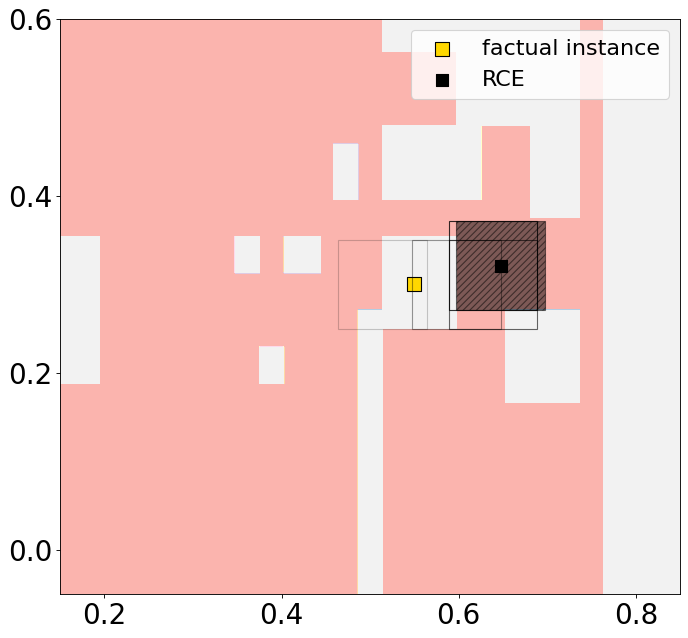

In [6]:
plt.figure(figsize=(10, 10), dpi=80)
xx, yy = np.meshgrid(np.arange(x_min-1, x_max-0.25, 0.0005),
                     np.arange(y_min-1, y_max-0.5, 0.0005))
f = lambda x: clf.predict(x)
Z = f(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(u.iloc[:, 0], u.iloc[:, 1], color='gold', edgecolors='k', label='factual instance', marker='s', s=150)


ii = 0
for k, v in solutions_master.items():
    ii += 1
    x_ = v['sol']
    if unc_type == 'l2':
        uncertainty_set = plt.Circle((x_.iloc[0,0], x_.iloc[0,1]), rho, color='k', fill=False, alpha=ii/len(solutions_master), zorder=ii)
    elif unc_type == 'linf':
        uncertainty_set =  plt.Rectangle((x_.iloc[0,0]-rho, x_.iloc[0,1]-rho), rho*2, rho*2, color='k', fill=False, alpha=ii/len(solutions_master), zorder=ii)
#     if ii%1 == 0:
#         plt.gca().add_patch(uncertainty_set)
    if ii == len(solutions_master):
        if unc_type == 'l2':
            uncertainty_set = plt.Circle((x_.iloc[0,0], x_.iloc[0,1]), rho, color='k', fill=True, alpha=0.5, zorder=ii)
        elif unc_type == 'linf':
            uncertainty_set =  plt.Rectangle((x_.iloc[0,0]-rho, x_.iloc[0,1]-rho), rho*2, rho*2, color='k', fill=True, alpha=0.5, hatch=r"////", zorder=ii)
    plt.gca().add_patch(uncertainty_set)
    
plt.scatter(x_.iloc[0,0], x_.iloc[0,1], color='k', edgecolors='k', marker='s', alpha=1, s=100, label='RCE')
plt.xlim(x_min+0.65, x_max-0.65)
plt.ylim(y_min+0.45, y_max-0.9)
plt.locator_params(nbins=6)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right', prop={'size': 20})